In [22]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from utils import create_patches

(10, 10, 3)


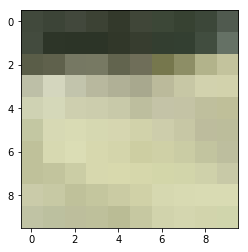

In [25]:
path = 'data/train/'
fp = open('data/iids_train.txt')
lines = fp.read().splitlines() # Create a list containing all lines
fp.close()
num_patches = 100

output = create_patches.create_patches(path, lines, num_patches)
print(output[100].shape)
plt.imshow(output[1])
plt.show()

In [21]:
print(output.shape)

(20000, 10, 10, 3)
